# Frozen Lake

Applying the technique demonstrated in q_learning.ipynb to the Frozen Lake environment.  
(https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)

In [19]:
import gym
import numpy as np
import pandas as pd

from qlearn import DiscreteQTable, DeepQTableSeq, plot_rewards, basic_training, run_episode

Create a new enviroment, reset and show the state:

In [20]:
lake_env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True) #Standard: 'FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True
lake_env.reset() 
lake_env.render()

print('\nAction Space: {}'.format(lake_env.action_space))
print('Observation Space: {}'.format(lake_env.observation_space))

qtable = DiscreteQTable(lake_env)



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Action Space: Discrete(4)
Observation Space: Discrete(64)


In [21]:
# --HYPERPARAMETERS--
total_episodes = 10000	    # Total episodes 1000
alpha = 0.3 		        # Learning rate, not too high, not too low 0.3
gamma = 0.99 				# Discounting rate 0.99

# Exploration parameters
epsilon = 1 				# Exploration rate 1
epsilon_min = 0.00001		# Min exploration probability 0.01
epsilon_decay = 0.001		# Exponential decay rate for exploration probability 0.001

Main differences between 4x4 and 8x8:   
More episodes to train the Q-table.   
Bigger gamma and smaller epsilon decay rate because we have a larger environment to explore (8x8) which is 4 times larger.   
The chance for a random action sequence to reach the end of the frozen lake in a 4x4 grid is much higher than the chance for an 8x8 grid.   

<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

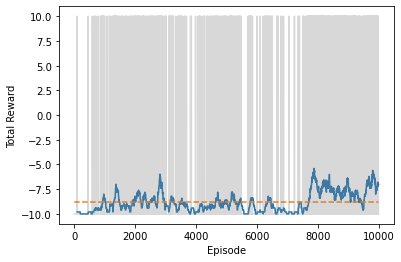

In [22]:
plot_rewards(basic_training(lake_env, qtable, episodes=total_episodes, alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min))
#standard: alpha=0.1, gamma=0.6, epsilon=0.1, epsilon_decay=0, epsilon_min=0.01, verbose: bool=False

Now we train our agent to learn the Q-table and have a look at rewards:

Average reward: 0.339


<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

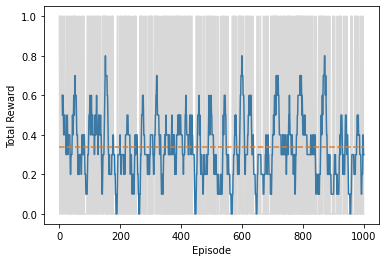

In [17]:
rewards = [run_episode(lake_env, qtable=qtable).reward for _ in range(1000)]
print('Average reward: {}'.format(np.mean((rewards))))

plot_rewards(rewards)
